In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import loadtxt
from numpy import cos,sin,pi,arctan,arcsin

In [2]:
def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return '{}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn

In [3]:
#importing data for logged (a,h/a)
hoverr=loadtxt("hoverr.txt")

#unlogging and scaling

hapc=(10**hoverr[:,0]) #pc
ham=(3.1*10**16)*hapc #m #this is what we use for calculations 
harg=ham/(1.5*10**11) #rg #this is what we plot

#horizontal above
#vertical below

hovera=10**hoverr[:,1] #h/a

h=ham*hovera #calculating thickness h ********check which 'a' I should be using


#importing data for logged (a,σ)
σden=loadtxt("SurfaceDensity.txt")

#unlogging and scaling

σapc=(10**σden[:,0]) #pc
σam=(3.1*10**16)*σapc #m #this is what we use for calculations 
σarg=σam/(1.5*10**11) #rg #this is what we plot

#horizontal above
#vertical below

σ=10**σden[:,1] #surface density

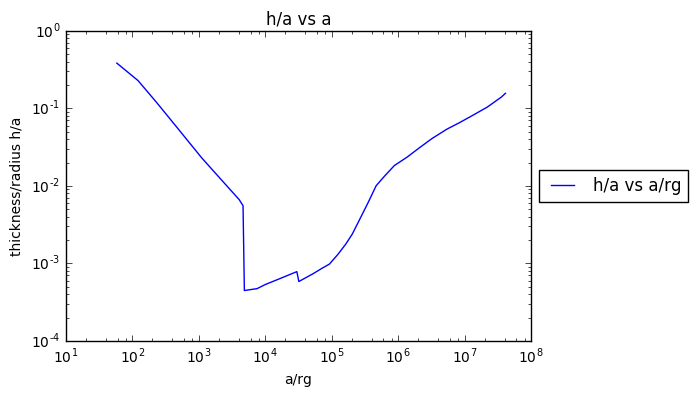

In [4]:
# (a,h/a)

logPlot=plt.gca()
#logPlot.loglog(hapc,hovera, label='pc')
#logPlot.loglog(ham,hovera, label='m')
logPlot.loglog(harg,hovera, label='h/a vs a/rg')
plt.title('h/a vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('thickness/radius h/a')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('1 Height_a vs a.pdf')

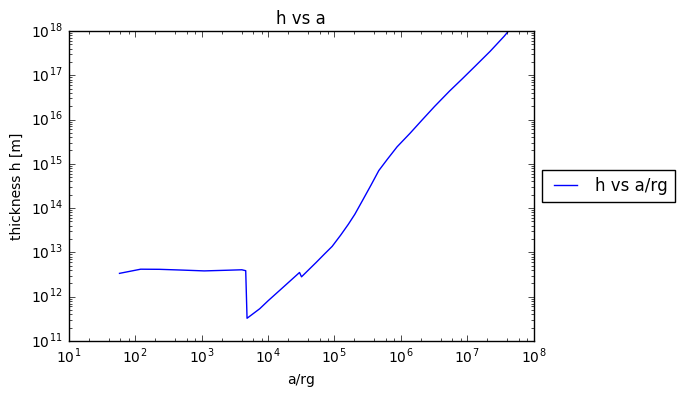

In [5]:
# (a,h)

#(a,h) coordinates in array h_
h_=np.zeros((34,2))
h_[:,0]=harg
h_[:,1]=h
#print(h_)

logPlot=plt.gca()
#logPlot.loglog(hapc,h, label='pc')
#logPlot.loglog(ham,h, label='m')
logPlot.loglog(harg,h, label='h vs a/rg')
plt.title('h vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('thickness h [m]')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('2 Height vs a.pdf')

In [6]:
#interpolating h as a function of radius
def hint(a):
    for i in range(len(harg)-1):
        j=i+1
        c = Point(harg[i],h[i])
        d = Point(harg[j],h[j])
        if ((a>=harg[i]) and (a<harg[j])):
            y=(slope(harg[j]-harg[i],h[j]-h[i])*a)+(Point.y_int(c,d))
        if ((a==harg[33])):
            y=h[33]
    return y

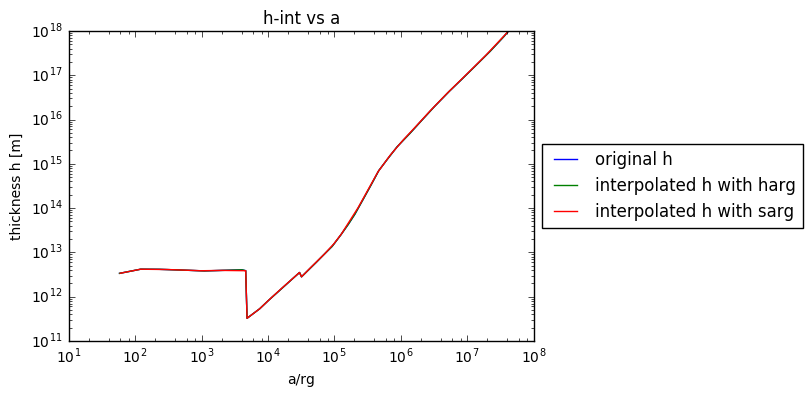

In [7]:
# (a,h) & (a,hint) comparison

#creating a list of values for interpolated thickness hint
h_int1=[]
for i in range(len(harg)):
    h_int1.append(hint(harg[i]))
h_int2=[]
for i in range(len(σarg)):
    h_int2.append(hint(σarg[i]))
    
logPlot=plt.gca()
logPlot.loglog(harg,h,label='original h')
logPlot.loglog(harg,h_int1,label='interpolated h with harg')
logPlot.loglog(σarg,h_int2,label='interpolated h with sarg')
plt.title('h-int vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('thickness h [m]')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('2a Height-interp vs a.pdf')

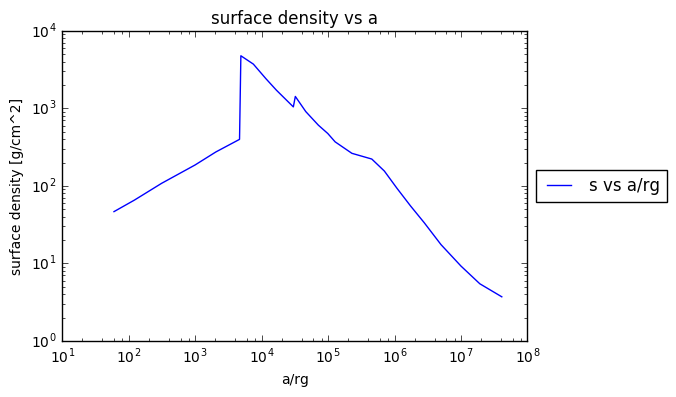

In [8]:
# (a,σ)

#(a,σ) coordinates in array σden_
σden_=np.zeros((26,2))
σden_[:,0]=σarg
σden_[:,1]=σ
#print(σden_)

logPlot=plt.gca()
#logPlot.loglog(σapc,σ, label='pc')
#logPlot.loglog(σam,σ, label='m')
logPlot.loglog(σarg,σ, label='s vs a/rg')
plt.title('surface density vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('surface density [g/cm^2]')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('3 SurfaceDensity vs a.pdf')

In [9]:
#interpolating σ as a function of radius
def σint(a):    
    for i in range(len(σarg)-1):
        j=i+1
        c = Point(σarg[i],σ[i])
        d = Point(σarg[j],σ[j])
        c_0 = Point(σarg[0],σ[0])
        d_1 = Point(σarg[1],σ[1])
        c_24 = Point(σarg[24],σ[24])
        d_25 = Point(σarg[25],σ[25])
        if ((a>=harg[0]) and (a<σarg[0])):
            y=(slope(σarg[1]-σarg[0],σ[1]-σ[0])*a)+(Point.y_int(c_0,d_1))
        if ((a>=σarg[i]) and (a<σarg[j])):
            y=(slope(σarg[j]-σarg[i],σ[j]-σ[i])*a)+(Point.y_int(c,d))
        if ((a==σarg[25])):
            y=σ[25]
        if ((a>σarg[25]) and (a<=harg[33])):
            y=(slope(σarg[25]-σarg[24],σ[25]-σ[24])*a)+(Point.y_int(c_24,d_25))
    return y

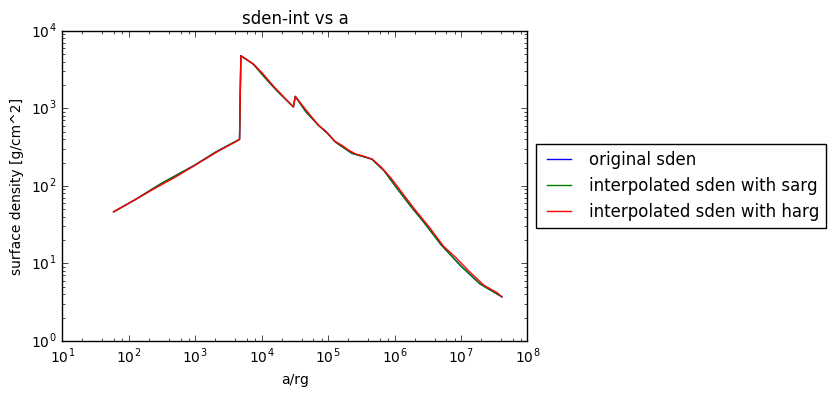

In [10]:
# (a,σ) & (a,σint) comparison

#creating lists of values for interpolated surface density σint
σdenint1=[]
for i in range(len(harg)):
    σdenint1.append(σint(harg[i]))
σdenint2=[]
for i in range(len(σarg)):
    σdenint2.append(σint(σarg[i]))

logPlot=plt.gca()
logPlot.loglog(σarg,σ,label='original sden')
logPlot.loglog(σarg,σdenint2,label='interpolated sden with sarg')
logPlot.loglog(harg,σdenint1,label='interpolated sden with harg')
plt.title('sden-int vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('surface density [g/cm^2]')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('3a SurfaceDensity-interp vs a.pdf')

In [11]:
#creating a density function ρ with respect to radius
def ρ(a):
    ρcal=σint(a)/(hint(a)*100)
    return ρcal

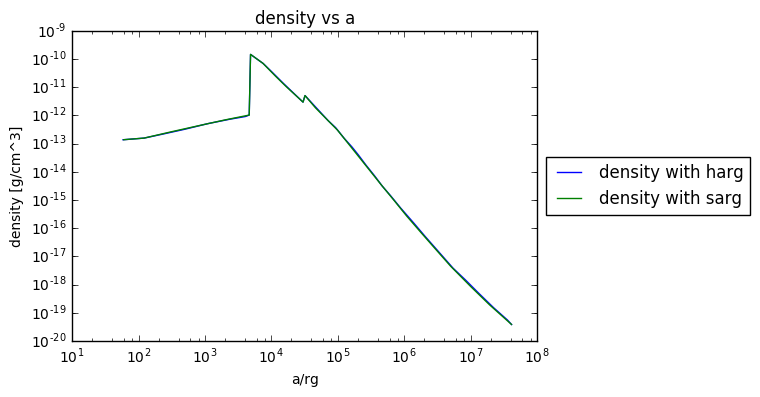

In [12]:
# (a,ρ)

#creating a list of values for density ρ
ρden1=[]
for i in range(len(harg)):
    ρden1.append(ρ(harg[i]))
ρden2=[]
for i in range(len(σarg)):
    ρden2.append(ρ(σarg[i]))

logPlot=plt.gca()
logPlot.loglog(harg,ρden1,label='density with harg')
logPlot.loglog(σarg,ρden2,label='density with sarg')
plt.title('density vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('density [g/cm^3]')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('4 Density vs a.pdf')

In [13]:
#creating function for Keplerian velocity v as function of radius

#setting values of fundamental constants
G=6.67*(10**-11) #(m**3)/(kg*(s**2))
M=(10**8)*1.99*(10**30) #kg

def vel(a):
    speed=((2*G*M/a)**0.5)/(1000) #km/s
    return speed

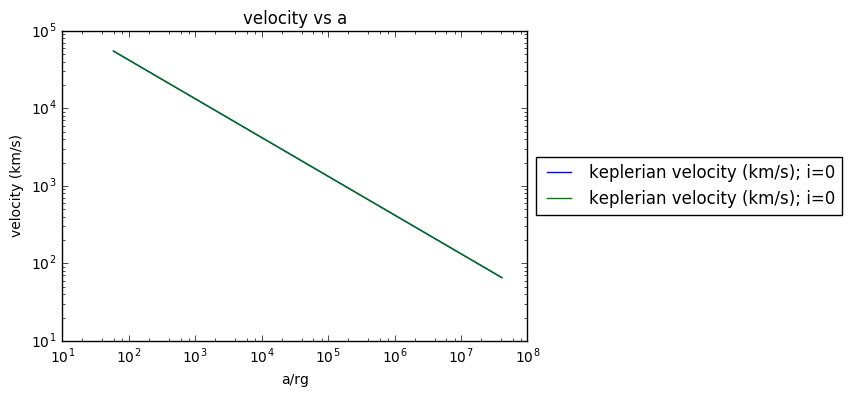

In [14]:
# (a,vel) for i=0 (i.e. no inclination)

logPlot=plt.gca()
logPlot.loglog(harg,vel(ham),label='keplerian velocity (km/s); i=0')
logPlot.loglog(σarg,vel(σam),label='keplerian velocity (km/s); i=0') #same as above
plt.title('velocity vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('velocity (km/s)')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('5 v kep vs a.pdf')

In [15]:
#creating function for time of orbit Torb as function of radius (through velocity)

def Torb(a):
    torb=(2*pi*a/1000)/vel(a)
    return torb

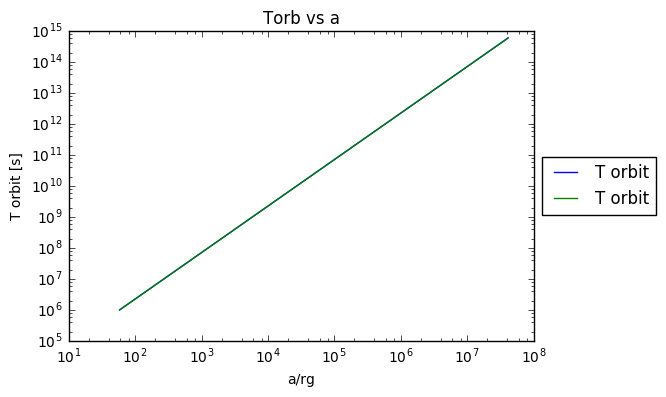

In [16]:
# (a,Torb)

logPlot=plt.gca()
logPlot.loglog(harg,Torb(ham),label='T orbit')
logPlot.loglog(σarg,Torb(σam),label='T orbit') #same as above
plt.title('Torb vs a')
logPlot.set_xlabel('a/rg')
logPlot.set_ylabel('T orbit [s]')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('6 Time orb vs a.pdf')

In [17]:
#creating function for time in disk Tdisk as function of radius (through velocity and Torb)

def Tdisk(arg,am):
    tdisk=(2*hint(arg)*Torb(am))/(2*pi*am)
    return tdisk

#creating a list of values for Tdisk
Tdisk1=[]
for i in range(len(harg)):
    Tdisk1.append(Tdisk(harg[i],ham[i]))
    #Tdisk1.append((2*hint(harg[i])*Torb(ham[i]))/(2*pi*ham[i]))
Tdisk2=[]
for i in range(len(σarg)):
    Tdisk2.append(Tdisk(σarg[i],σam[i]))
    #Tdisk2.append((2*hint(σarg[i])*Torb(σam[i]))/(2*pi*σam[i]))

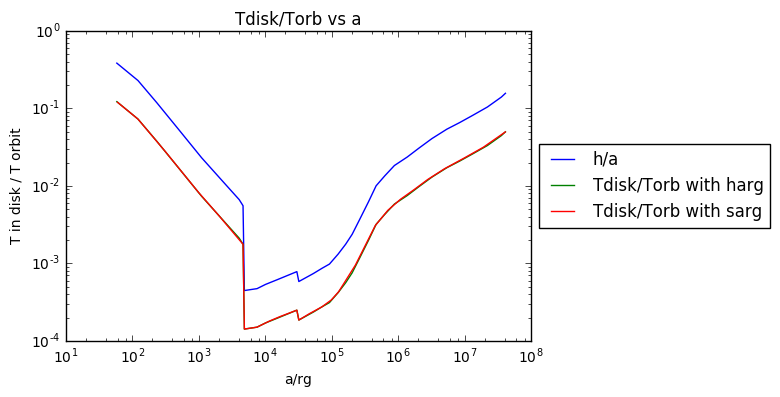

In [18]:
# (a,Tdisk/Torb)

logPlot=plt.gca()
logPlot.loglog(harg,hovera,label='h/a')
logPlot.loglog(harg,Tdisk1/Torb(ham),label='Tdisk/Torb with harg')
logPlot.loglog(σarg,Tdisk2/Torb(σam),label='Tdisk/Torb with sarg')
plt.title('Tdisk/Torb vs a')
logPlot.set_xlabel('a/rg') 
logPlot.set_ylabel('T in disk / T orbit')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
#plt.savefig('7 Timedisk_Timeorb vs a.pdf')

In [19]:
# creating a list of i values

i_0=0
#i_min=arcsin(h/(2*a))
i_pi6=pi/6
i_pi4=pi/4
i_pi3=pi/3
i_pi2=pi/2
i_4pi6=4*pi/6
i_3pi4=3*pi/4
i_5pi6=5*pi/6
#i_max=pi-arcsin(h/(2*a))
i_pi=pi
i_vals=[i_pi6,i_pi4,i_pi3,i_pi2,i_4pi6,i_3pi4,i_5pi6,i_pi]

In [20]:
# keplarian velocity vel components
def vkx(i,a):
    kcomp=vel(a)*cos(i)
    return kcomp
def vky(i,a):
    kcomp=vel(a)*sin(i)
    return kcomp

# relative velocity components
def vrx(i,a):
    rcomp=vel(a)-vkx(i,a)
    return rcomp
def vry(i,a):
    rcomp=vky(i,a)
    return rcomp

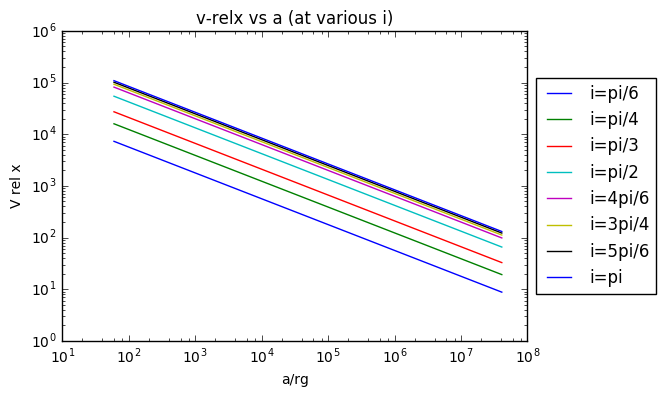

In [21]:
# (a, v relx)

logPlot=plt.gca()
logPlot.loglog(σarg,vrx(i_pi6,σam),label='i=pi/6')
logPlot.loglog(σarg,vrx(i_pi4,σam),label='i=pi/4')
logPlot.loglog(σarg,vrx(i_pi3,σam),label='i=pi/3')
logPlot.loglog(σarg,vrx(i_pi2,σam),label='i=pi/2')
logPlot.loglog(σarg,vrx(i_4pi6,σam),label='i=4pi/6')
logPlot.loglog(σarg,vrx(i_3pi4,σam),label='i=3pi/4')
logPlot.loglog(σarg,vrx(i_5pi6,σam),label='i=5pi/6')
logPlot.loglog(σarg,vrx(i_pi,σam),label='i=pi')
plt.title('v-relx vs a (at various i)')
logPlot.set_xlabel('a/rg') 
logPlot.set_ylabel('V rel x')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('8 v-relx vs a.pdf')

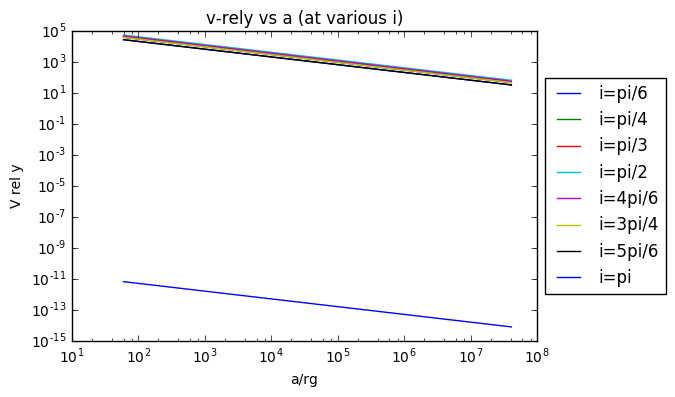

In [22]:
# (a, v rely)

logPlot=plt.gca()
logPlot.loglog(σarg,vry(i_pi6,σam),label='i=pi/6')
logPlot.loglog(σarg,vry(i_pi4,σam),label='i=pi/4')
logPlot.loglog(σarg,vry(i_pi3,σam),label='i=pi/3')
logPlot.loglog(σarg,vry(i_pi2,σam),label='i=pi/2')
logPlot.loglog(σarg,vry(i_4pi6,σam),label='i=4pi/6')
logPlot.loglog(σarg,vry(i_3pi4,σam),label='i=3pi/4')
logPlot.loglog(σarg,vry(i_5pi6,σam),label='i=5pi/6')
logPlot.loglog(σarg,vry(i_pi,σam),label='i=pi')
plt.title('v-rely vs a (at various i)')
logPlot.set_xlabel('a/rg') 
logPlot.set_ylabel('V rel y')
logPlot.legend()
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('9 v-rely vs a.pdf')

In [23]:
def vkx_new(i_initial,a_initial):
    vkx_initial=vkx(i_initial,a_initial)
    new=vkx_initial+dvx(i_initial,a_initial)
    return new
def vky_new(i_initial,a_initial):
    vky_initial=vky(i_initial,a_initial)
    new=vky_initial-dvy(i_initial,a_initial)
    return new
def i_new(i_initial,a_initial):
    new=arctan(vky_new(i_initial,a_initial)/vkx_new(i_initial,a_initial))
    return new

In [24]:
#def a_new(i_initial,a_initial): #*****this is where my problem lies******
#    new=(((2*G*M)**0.5)*(sin(i_new(i_initial,a_initial)))/vky_new(i_initial,a_initial))**2
#    check=(((2*G*M)**0.5)*(cos(i_new(i_initial,a_initial)))/vkx_new(i_initial,a_initial))**2
#    print (check)
#    return new
#def Torb_new(i_initial,a_initial):
#    new=Torb(a_new(i_initial,a_initial))
#    return new

In [25]:
#setting paramenters of object
msun=1.989*10e30 #kg
rsun=695.7e6 #m
Asun=4*pi*(rsun**2)
Cd=1

#def Fx1(i,am):
#    force=ρden1*(vrx(i,am)**2)*(Asun*Cd/2)
#    return force
#def Fx2(i,am):
#    force=(Asun*Cd/2)*ρden2*(vrx(i,am)**2)
#    return force

#creating lists of values for Fx
#Fx_1=[]
#for i in range(len(ham)):
#    Fx_1.append(Fx1(i,ham[j]))
#Fx_2=[]
#for i in range(len(σam)):
#    Fx_2.append(Fx2(σarg[i],σam[i]))


def Fy(i,a):
    force=(Asun*Cd/2)*ρ(a)*(vry(i,a)**2)
    return force

def dvx(i,a):
    change=Fx(i,a)*Torb(a)/msun
    return change
def dvy(i,a):
    change=Fy(i,a)*Torb(a)/msun
    return change

In [26]:
Fx1(pi/6,ham[10])

NameError: name 'Fx1' is not defined

In [ ]:
#def vky_t(i_initial,a_initial):
#    Torb_initial=Torb(a_initial)
#    vky_vals=[]
#    Torb_vals=[]
#    vky_min=hint(a_initial)/2
#    vky_=vky(i_initial,a_initial)
#    while (vky_<vky_min):
#        vky_vals.append(vky)
#        vky_=vky(i_new(i_initial,a_initial),a_initial)
#    print('completion of grind down')
#    return vky_vals

In [ ]:
#constant a and Torb
def vky_t(i_initial,a_initial):
    vky_vals=[]
    vky_min=hint(a_initial)/2
    vky_=vky(i_initial,a_initial)
    dvy_=dvy(i_initial,a_initial)
    i_new_=i_new(i_initial,a_initial)
    while (vky_<vky_min):
        vky_vals.append(vky_)
        vky_=vky_-dvy_
        dvy_=dvy(i_new_,a_initial)
        i_new_=i_new(i_new_,a_initial)
    print('completion of grind down')
    return vky_vals

In [ ]:
# creating a function for Tgrind with constant dvy, a, and Torb
def t_grind(i_initial,a_initial):
    n=vky(i_initial,a_initial)/dvy(i_initial,a_initial)
    tg=n*Torb(a_initial)/2
    return tg

In [ ]:
def t_grind_fi(a_initial):
    tgrind_fi=[]
    for i in range(len(i_vals)):
        t=t_grind(i_vals[i],a_initial)
        tgrind_fi.append(t)
    return tgrind_fi

In [ ]:
# creating a function to plot Tgrind as a function of i values for various radii (for both sets of radii)

def Tg_i1():
    logPlot=plt.gca()
    plt.title('Tgrind vs i')
    logPlot.set_xlabel('i')
    logPlot.set_ylabel('T grind')
    for i in range(len(σarg)):
        #plot=logPlot.loglog(i_vals,t_grind_fi(σarg[i]),label=σarg[i])
        plot=logPlot.semilogy(i_vals,t_grind_fi(σarg[i]),label=σarg[i])
        #plot=logPlot.plot(i_vals,t_grind_fi(σarg[i]),label=σarg[i])
        logPlot.legend()
        ax = plt.subplot(111)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plot

def Tg_i2():
    logPlot=plt.gca()
    plt.title('Tgrind vs i')
    logPlot.set_xlabel('i')
    logPlot.set_ylabel('T grind')
    for i in range(len(harg)):
        #plot=logPlot.loglog(i_vals,t_grind_fi(harg[i]),label=harg[i])
        plot=logPlot.semilogy(i_vals,t_grind_fi(harg[i]),label=harg[i])
        #plot=logPlot.plot(i_vals,t_grind_fi(harg[i]),label=harg[i])
        logPlot.legend()
        ax = plt.subplot(111)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plot

In [ ]:
# (i, Tgrind) 
Tg_i1()
#plt.savefig('10 Tg vs i_2.pdf')

In [ ]:
# (i, Tgrind) 
#Tg_i2()
#plt.savefig('10 Tg vs i_1.pdf')